In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/ruthabebe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruthabebe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
sephora_df = pd.read_csv('data/product_info.csv')
sephora_reviews = pd.read_csv('data/reviews_0-250.csv', low_memory=False)

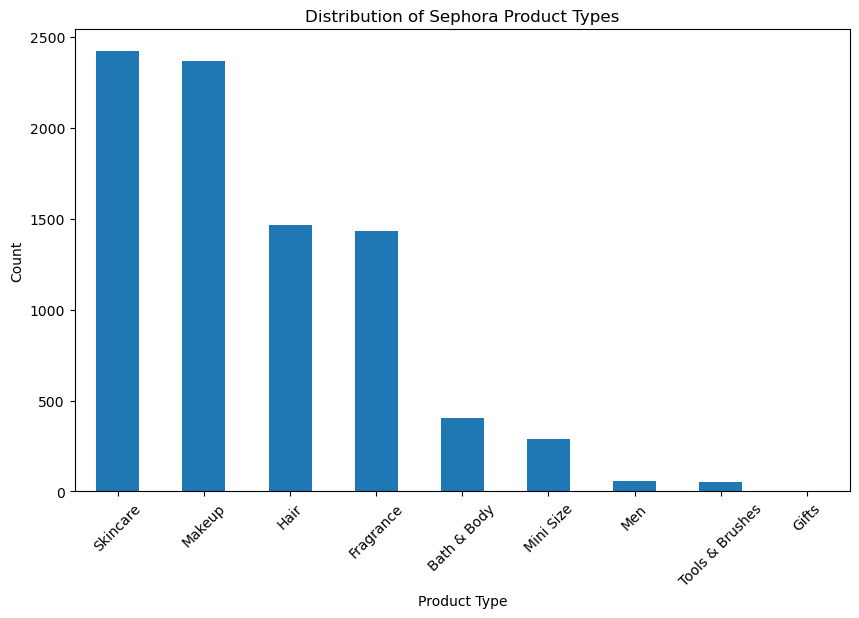

In [3]:
product_type_counts = sephora_df['primary_category'].value_counts()
plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar')
plt.title('Distribution of Sephora Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

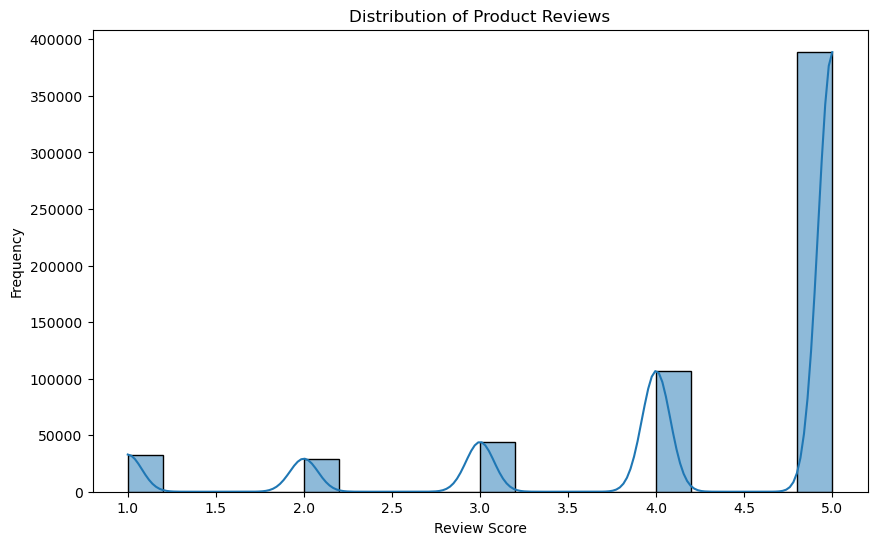

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(sephora_reviews['rating'], bins=20, kde=True)
plt.title('Distribution of Product Reviews')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

In [5]:
sephora_reviews['review_text'] = sephora_reviews['review_text'].fillna('')
all_reviews_text = ' '.join(sephora_reviews['review_text'])

# Tokenize the review text into individual words
words = word_tokenize(all_reviews_text.lower())  # Convert text to lowercase for case-insensitive counting

# Filter out non-alphabetic words and words with fewer than 3 characters
filtered_words = [word for word in words if word.isalpha() and len(word) > 2]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in filtered_words if word not in stop_words]

# Count the occurrence of each word
word_counts = Counter(filtered_words)

# Get the most common terms used
most_common_terms = word_counts.most_common(10)  # Change 10 to the desired number of terms to display

# Display the most common terms
print("Most common terms used in reviews:")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Most common terms used in reviews:
skin: 708305
product: 358722
love: 227189
use: 216294
face: 196547
like: 191617
using: 159951
really: 153850
dry: 135975
great: 116757


In [7]:
product_review_counts = sephora_reviews['product_name'].value_counts()

# Sort the products based on review counts in descending order
sorted_products = product_review_counts.sort_values(ascending=False)

# Display the products with the most reviews
most_reviewed_products = sorted_products.head(10)  # Change 10 to the desired number of products to display

print("Products with the most reviews:")
print(most_reviewed_products)


Products with the most reviews:
product_name
Lip Sleeping Mask Intense Hydration with Vitamin C                  16138
Soy Hydrating Gentle Face Cleanser                                   8736
100 percent Pure Argan Oil                                           7763
Ultra Repair Cream Intense Hydration                                 7547
Alpha Beta Extra Strength Daily Peel Pads                            7414
The True Cream Aqua Bomb                                             7294
Green Clean Makeup Removing Cleansing Balm                           6169
Green Clean Makeup Meltaway Cleansing Balm Limited Edition Jumbo     6169
Protini Polypeptide Firming Refillable Moisturizer                   6063
Superfood Antioxidant Cleanser                                       5864
Name: count, dtype: int64
